##### In finance load is the lending of money from one or more individuals, organizations,  or other entities to other individuals, organizations, etc.
Loan prediction using some selected Machine Learning Algorithms.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# get the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [9]:
df_train.shape

(614, 13)

In [10]:
df_test.shape

(367, 12)

In [11]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [32]:
# Missing Values: Check where there are missing values and fix them appropriately
total = df_train.isnull().sum().sort_values(ascending=False)

In [33]:
total

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [34]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

In [35]:
percent

Credit_History       0.081433
Self_Employed        0.052117
LoanAmount           0.035831
Dependents           0.024430
Loan_Amount_Term     0.022801
Gender               0.021173
Married              0.004886
Loan_Status          0.000000
Property_Area        0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
Loan_ID              0.000000
dtype: float64

In [36]:
# concatenate the total and percentage of missing data
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [37]:
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [40]:
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [50]:
# Fill the missing values
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0])
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0])
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().median())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0])
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0])
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0])

In [44]:
df_train['Gender'].shape

(614,)

In [51]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [52]:
# Now check if there is Nan value or not
total = df_train.isnull().sum().sort_values(ascending=False)

In [53]:
total

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
Loan_ID              0
dtype: int64

In [54]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

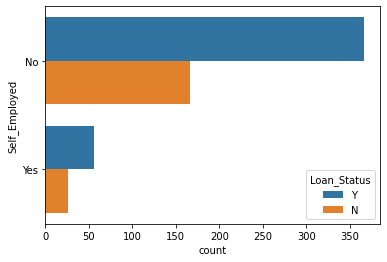

In [55]:
# Exploratory Data Analysis:
sns.countplot(y='Self_Employed', hue = 'Loan_Status', data = df_train)

In [56]:
df_train['Self_Employed']

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

In [57]:
df_train['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

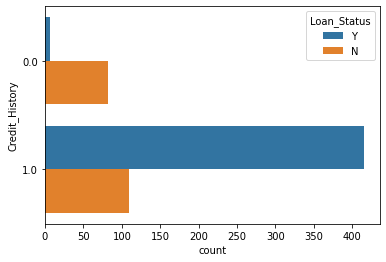

In [58]:
sns.countplot(y='Credit_History', hue = 'Loan_Status', data = df_train)

In [59]:
df_train['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

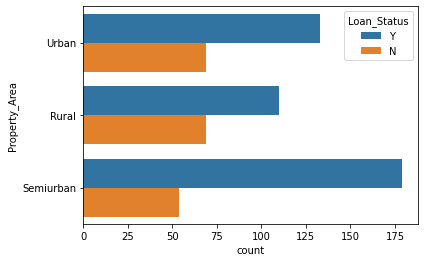

In [60]:
sns.countplot(y='Property_Area', hue = 'Loan_Status', data = df_train)

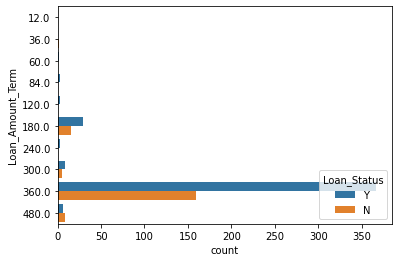

In [61]:
sns.countplot(y='Loan_Amount_Term', hue = 'Loan_Status', data = df_train)

In [63]:
# Encoding to numeric data; getting ready for training
# change categorical data into 1 or 0

In [65]:
code_numeric = {'Male': 1, 'Female': 2, 'Yes': 1, 'No': 2, 'Graduate': 1, 'Not Graduate': 2, 'Urban': 3, 'Semiurban': 2,'Rural': 1,'Y': 1, 'N': 0, '3+': 3}

In [66]:
code_numeric

{'Male': 1,
 'Female': 2,
 'Yes': 1,
 'No': 2,
 'Graduate': 1,
 'Not Graduate': 2,
 'Urban': 3,
 'Semiurban': 2,
 'Rural': 1,
 'Y': 1,
 'N': 0,
 '3+': 3}

In [67]:
# change values in df_train

In [68]:
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [69]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,2,0,1,2,5849,0.0,128.0,360.0,1.0,3,1
1,LP001003,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2,2,0,1,2,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,1,1,3,1,2,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,1,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1
612,LP002984,1,1,2,1,2,7583,0.0,187.0,360.0,1.0,3,1


In [70]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0,1,2.0,5720,0,110.0,360.0,1.0,3
1,LP001022,1.0,1,1,1,2.0,3076,1500,126.0,360.0,1.0,3
2,LP001031,1.0,1,2,1,2.0,5000,1800,208.0,360.0,1.0,3
3,LP001035,1.0,1,2,1,2.0,2340,2546,100.0,360.0,NaN,3
4,LP001051,1.0,2,0,2,2.0,3276,0,78.0,360.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,1,3,2,1.0,4009,1777,113.0,360.0,1.0,3
363,LP002975,1.0,1,0,1,2.0,4158,709,115.0,360.0,1.0,3
364,LP002980,1.0,2,0,1,2.0,3250,1993,126.0,360.0,NaN,2
365,LP002986,1.0,1,0,1,2.0,5000,2393,158.0,360.0,1.0,1


In [71]:
total = df_test.isnull().sum().sort_values(ascending=False)

In [72]:
total

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

In [73]:
# Drop the uniqe loan ID'S there is not use of load id's
df_train.drop('Loan_ID', axis=1, inplace=True)

In [74]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,128.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,0,1,2,2900,0.0,71.0,360.0,1.0,1,1
610,1,1,3,1,2,4106,0.0,40.0,180.0,1.0,1,1
611,1,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1
612,1,1,2,1,2,7583,0.0,187.0,360.0,1.0,3,1


In [75]:
df_train.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [76]:
df_train.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.182410,1.346906,1.218241,1.866450,5403.459283,1621.245798,145.752443,342.410423,0.855049,2.037459,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,1.000000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000


In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [78]:
df_train['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [79]:
# convert df train and test into numeric

In [80]:
dependents_ = pd.to_numeric(df_train.Dependents)
dependents__ = pd.to_numeric(df_test.Dependents)

In [81]:
dependents_

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

In [82]:
dependents__

0      0.0
1      1.0
2      2.0
3      2.0
4      0.0
      ... 
362    3.0
363    0.0
364    0.0
365    0.0
366    0.0
Name: Dependents, Length: 367, dtype: float64

In [83]:
df_train.drop(['Dependents'], axis=1, inplace=True)
df_test.drop(['Dependents'], axis=1, inplace=True)

In [84]:
df_train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,1,2,5849,0.0,128.0,360.0,1.0,3,1
1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,1,2,2900,0.0,71.0,360.0,1.0,1,1
610,1,1,1,2,4106,0.0,40.0,180.0,1.0,1,1
611,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1
612,1,1,1,2,7583,0.0,187.0,360.0,1.0,3,1


In [85]:
df_test

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,1,2.0,5720,0,110.0,360.0,1.0,3
1,LP001022,1.0,1,1,2.0,3076,1500,126.0,360.0,1.0,3
2,LP001031,1.0,1,1,2.0,5000,1800,208.0,360.0,1.0,3
3,LP001035,1.0,1,1,2.0,2340,2546,100.0,360.0,NaN,3
4,LP001051,1.0,2,2,2.0,3276,0,78.0,360.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,1,2,1.0,4009,1777,113.0,360.0,1.0,3
363,LP002975,1.0,1,1,2.0,4158,709,115.0,360.0,1.0,3
364,LP002980,1.0,2,1,2.0,3250,1993,126.0,360.0,NaN,2
365,LP002986,1.0,1,1,2.0,5000,2393,158.0,360.0,1.0,1


In [86]:
df_train = pd.concat([df_train, dependents_], axis=1)
df_test = pd.concat([df_test, dependents_], axis=1)

In [87]:
df_train


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,1,2,1,2,5849,0.0,128.0,360.0,1.0,3,1,0
1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0,1
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,1,0
3,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,1,0
4,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,1,2,2900,0.0,71.0,360.0,1.0,1,1,0
610,1,1,1,2,4106,0.0,40.0,180.0,1.0,1,1,3
611,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1,1
612,1,1,1,2,7583,0.0,187.0,360.0,1.0,3,1,2


In [88]:
df_test

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,LP001015,1.0,1.0,1.0,2.0,5720.0,0.0,110.0,360.0,1.0,3.0,0
1,LP001022,1.0,1.0,1.0,2.0,3076.0,1500.0,126.0,360.0,1.0,3.0,1
2,LP001031,1.0,1.0,1.0,2.0,5000.0,1800.0,208.0,360.0,1.0,3.0,0
3,LP001035,1.0,1.0,1.0,2.0,2340.0,2546.0,100.0,360.0,NaN,3.0,0
4,LP001051,1.0,2.0,2.0,2.0,3276.0,0.0,78.0,360.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


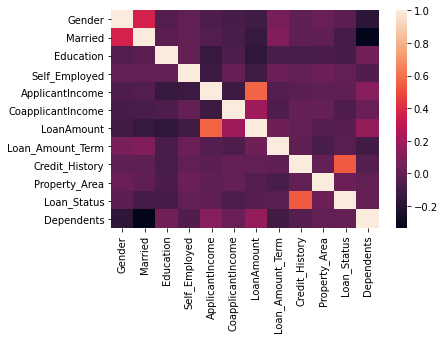

In [91]:
sns.heatmap(df_train.corr())

In [93]:
# Now split and train the mode
# Seperate the targer from the df_train
y = df_train['Loan_Status']
x = df_train.drop('Loan_Status', axis=1)

In [94]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,1,2,1,2,5849,0.0,128.0,360.0,1.0,3,0
1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,1
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,0
3,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,0
4,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,1,2,2900,0.0,71.0,360.0,1.0,1,0
610,1,1,1,2,4106,0.0,40.0,180.0,1.0,1,3
611,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1
612,1,1,1,2,7583,0.0,187.0,360.0,1.0,3,2


In [95]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [98]:
x_train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
90,1,1,1,2,2958,2900.0,131.0,360.0,1.0,2,0
533,1,2,1,2,11250,0.0,196.0,360.0,1.0,2,1
452,1,1,1,2,3948,1733.0,149.0,360.0,0.0,1,0
355,2,2,1,2,3813,0.0,116.0,180.0,1.0,3,0
266,1,1,1,2,4708,1387.0,150.0,360.0,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,1,2,3103,1300.0,80.0,360.0,1.0,3,0
9,1,1,1,2,12841,10968.0,349.0,360.0,1.0,2,1
359,1,1,1,2,5167,3167.0,200.0,360.0,1.0,2,3
192,1,1,2,2,6033,0.0,160.0,360.0,1.0,3,0


In [99]:
x_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
454,1,2,1,1,7085,0.0,84.0,360.0,1.0,2,0
52,2,2,1,2,4230,0.0,112.0,360.0,1.0,2,0
536,1,1,1,2,6133,3906.0,324.0,360.0,1.0,3,0
469,1,1,1,2,4333,2451.0,110.0,360.0,1.0,3,0
55,1,1,1,2,2708,1167.0,97.0,360.0,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
337,1,1,1,1,2500,4600.0,176.0,360.0,1.0,1,2
376,1,1,1,2,8750,4996.0,130.0,360.0,1.0,1,3
278,1,1,1,2,14583,0.0,436.0,360.0,1.0,2,0
466,1,1,2,2,2947,1664.0,70.0,180.0,0.0,3,3


In [100]:
y_train

90     1
533    0
452    0
355    1
266    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 491, dtype: int64

In [101]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64

In [104]:
# 1. Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/home/amber/Desktop/Amber_Gautam/datascience/ml_examples/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [105]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [106]:
accuracy_score(y_test, y_pred)

0.8373983739837398

In [108]:
f1_score(y_test, y_pred)

0.8979591836734695

In [109]:
# Random forest classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [111]:
y_pred = rfc.predict(x_test)

In [112]:
accuracy_score(y_test, y_pred)

0.7642276422764228

In [113]:
f1_score(y_test, y_pred)

0.8465608465608466

In [114]:
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train)

DecisionTreeClassifier()